In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def get_measure(exp, run=1, fraction=0.5, measure='AP'):
    with open('/Users/prakash/Desktop/Noise2Seg_cluster/experiments/{}_run{}/fraction_{}/scores.csv'.format(exp, run, fraction)) as f:
        line = f.readline()
        while line:
            line = line.strip().split(',')
            if line[0] == measure:
                return float(line[1])
            line = f.readline()
    return None

In [18]:
def read_Noise2Seg_results(exp, measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0]):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            scores.append(get_measure(exp, run=r, fraction=frac, measure=measure))
        
        scores = np.array(scores)
        stats.append(scores)
    
    return np.array(stats)

In [19]:
DSB_n10_AP_noise2seg = read_Noise2Seg_results('noEarlyStop_w_1_1_DSB_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 
                                      16.0, 32.0, 64.0, 100.0])

DSB_n10_SEG_noise2seg = read_Noise2Seg_results('noEarlyStop_w_1_1_DSB_n10', measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 
                                      16.0, 32.0, 64.0, 100.0])

DSB_n10_SEGoptAP_noise2seg = read_Noise2Seg_results('noEarlyStop_w_1_1_DSB_n10', measure='SEG_AP-Threshold', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 
                                      16.0, 32.0, 64.0, 100.0])

In [21]:
DSB_n10_AP_noise2seg.shape

(10, 5)

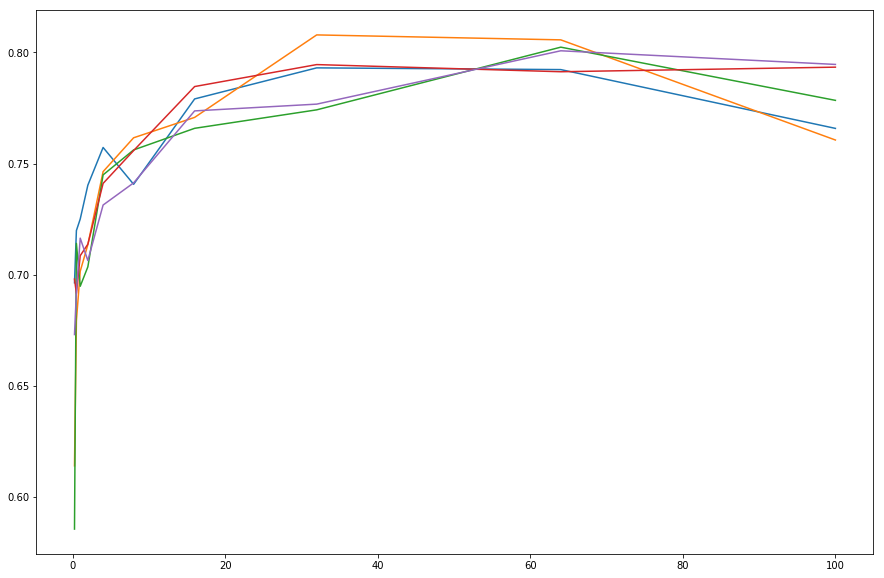

In [24]:
fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0]
fig = plt.figure(figsize=(15,10))
plt.plot(fractions, DSB_n10_AP_noise2seg[:, 0])
plt.plot(fractions, DSB_n10_AP_noise2seg[:, 1])
plt.plot(fractions, DSB_n10_AP_noise2seg[:, 2])
plt.plot(fractions, DSB_n10_AP_noise2seg[:, 3])
plt.plot(fractions, DSB_n10_AP_noise2seg[:, 4])
plt.show()